Load the tips dataset from either pydataset or seaborn.

Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

Here is some sample code to get you started:

from statsmodels.formula.api import ols

model = ols('y ~ x', data=df).fit()
predictions = model.predict(df.x)
The code above fits a linear regression model on the df dataset, using column y as the target and column x as the predictor. Modify the code as necessary to work with the tips dataset.

Plot the residuals for the linear regression model that you made.

Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

What is the amount of variance explained in your model?

Is your model significantly better than the baseline model?

Create a file named evaluate.py that contains the following functions.

plot_residuals(y, yhat): creates a residual plot
regression_errors(y, yhat): returns the following values:
sum of squared errors (SSE)
explained sum of squares (ESS)
total sum of squares (TSS)
mean squared error (MSE)
root mean squared error (RMSE)
baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false
model_significance(ols_model): that takes the ols model as input and returns the amount of variance explained in your model, and the value telling you whether your model is significantly better than the baseline model (Hint: use the rsquared and f_pvalue properties from the ols model)
Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

**Load the tips dataset from either pydataset or seaborn.**

In [1]:
import pydataset
import pandas as pd

df = pydataset.data('tips')

df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


**Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.**

In [2]:
from statsmodels.formula.api import ols

# The code above fits a linear regression model on the df dataset, 
# using column y as the target and column x as the predictor. 
# Modify the code as necessary to work with the tips dataset.

model = ols('tip ~ total_bill', data=df).fit() 

predictions = model.predict(df.total_bill) 

df["predictions(yhat)"] = predictions

df.head()

,total_bill,tip,sex,smoker,day,time,size,predictions(yhat)
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822


**Plot the residuals for the linear regression model that you made.**

In [3]:
df['residual'] = df['predictions(yhat)'] - df['tip']

df.head()

,total_bill,tip,sex,smoker,day,time,size,predictions(yhat),residual
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,1.694636
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,0.346223
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,-0.373165
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,0.097250
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,-0.107178


Text(0.5, 1.0, 'residuals')

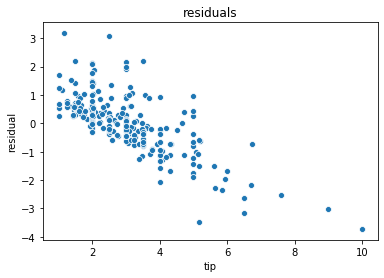

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.scatterplot(x='tip',y='residual',data=df)
plt.title("residuals")

**baseline**

In [5]:
df['baseline'] = df['tip'].mean()

df.head()

,total_bill,tip,sex,smoker,day,time,size,predictions(yhat),residual,baseline
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,1.694636,2.998279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,0.346223,2.998279
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,-0.373165,2.998279
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,0.097250,2.998279
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,-0.107178,2.998279


**sum of squared errors / Explained sum of squares**

In [6]:
df['residual^2'] = df.residual ** 2

df.head()

,total_bill,tip,sex,smoker,day,time,size,predictions(yhat),residual,baseline,residual^2
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,1.694636,2.998279,2.871792
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,0.346223,2.998279,0.119870
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,-0.373165,2.998279,0.139252
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,0.097250,2.998279,0.009458
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,-0.107178,2.998279,0.011487


In [7]:
SSE = sum(df['residual^2'])
print("SSE = ", SSE)

SSE =  252.78874385077603


**mean squared error**

In [8]:
MSE = SSE/len(df)

print("MSE = ", MSE)

MSE =  1.036019442011377


**root mean squared error**

In [9]:
from math import sqrt
RMSE = sqrt(MSE)

print("RMSE = ", RMSE)

RMSE =  1.0178504025697377


**Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model**

**(i.e. a model that always predicts the average tip amount).**

In [10]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,predictions(yhat),residual,baseline,residual^2
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,1.694636,2.998279,2.871792
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,0.346223,2.998279,0.119870
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,-0.373165,2.998279,0.139252
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,0.097250,2.998279,0.009458
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,-0.107178,2.998279,0.011487


In [11]:
df['residual_baseline'] = df['baseline'] - df['tip']

df.head()

,total_bill,tip,sex,smoker,day,time,size,predictions(yhat),residual,baseline,residual^2,residual_baseline
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,1.694636,2.998279,2.871792,1.988279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,0.346223,2.998279,0.119870,1.338279
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,-0.373165,2.998279,0.139252,-0.501721
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,0.097250,2.998279,0.009458,-0.311721
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,-0.107178,2.998279,0.011487,-0.611721


In [12]:
df['residual_baseline^2'] = df.residual_baseline ** 2

df.head()

,total_bill,tip,sex,smoker,day,time,size,predictions(yhat),residual,baseline,residual^2,residual_baseline,residual_baseline^2
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,1.694636,2.998279,2.871792,1.988279,3.953252
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,0.346223,2.998279,0.119870,1.338279,1.790990
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,-0.373165,2.998279,0.139252,-0.501721,0.251724
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,0.097250,2.998279,0.009458,-0.311721,0.097170
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,-0.107178,2.998279,0.011487,-0.611721,0.374203


**sum of squared errors base**

In [13]:
SSE_baseline = sum(df['residual_baseline^2'])

print("SSE - baseline = ", SSE_baseline)

SSE - baseline =  465.21247704918085


**mean squared error base**

In [14]:
MSE_baseline = SSE_baseline/len(df)


print("MSE baseline = ", MSE_baseline)

MSE baseline =  1.9066085124966428


**root mean squared error base**

In [15]:
RMSE_baseline = sqrt(MSE_baseline)

print("RMSE baseline = ", RMSE_baseline)

RMSE baseline =  1.3807999538298958


**Write python code that compares the sum of squared errors for your model against the sum of squared errors**

**and outputs whether or not your model performs better than the baseline model.**

In [16]:
def get_SSE_comparison(SSE,SSE_baseline):
    
    if SSE < SSE_baseline:
        return True
    else:
        return False
    
if get_SSE_comparison(RMSE,RMSE_baseline):
    
    print("This model outpreforms the baseline!")
    
else:
    
    print("This model does not out preform the baseline!")
    

This model outpreforms the baseline!


**What is the amount of variance explained in your model?**

In [17]:
df['pred-base'] = df['predictions(yhat)'] - df.baseline
df['(pred-base)^2'] = df['pred-base']**2

df.head()

,total_bill,tip,sex,smoker,day,time,size,predictions(yhat),residual,baseline,residual^2,residual_baseline,residual_baseline^2,pred-base,(pred-base)^2
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,1.694636,2.998279,2.871792,1.988279,3.953252,-0.293643,0.086226
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,0.346223,2.998279,0.119870,1.338279,1.790990,-0.992056,0.984174
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,-0.373165,2.998279,0.139252,-0.501721,0.251724,0.128556,0.016527
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,0.097250,2.998279,0.009458,-0.311721,0.097170,0.408971,0.167258
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,-0.107178,2.998279,0.011487,-0.611721,0.374203,0.504544,0.254564


In [18]:
ESS = df['(pred-base)^2'].sum()

print('ESS ',ESS)

ESS  212.4237331984042


In [19]:
TSS = SSE + ESS

print('TSS',TSS)

TSS 465.2124770491802


In [20]:
r_squared = ESS/TSS

print("R^2", r_squared)
print("Percent of variance in tips explained by total_bill = ", round(r_squared*100,1), "%")

R^2 0.45661658635167623
Percent of variance in tips explained by total_bill =  45.7 %


In [21]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,predictions(yhat),residual,baseline,residual^2,residual_baseline,residual_baseline^2,pred-base,(pred-base)^2
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,1.694636,2.998279,2.871792,1.988279,3.953252,-0.293643,0.086226
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,0.346223,2.998279,0.119870,1.338279,1.790990,-0.992056,0.984174
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,-0.373165,2.998279,0.139252,-0.501721,0.251724,0.128556,0.016527
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,0.097250,2.998279,0.009458,-0.311721,0.097170,0.408971,0.167258
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,-0.107178,2.998279,0.011487,-0.611721,0.374203,0.504544,0.254564


In [23]:
from sklearn.metrics import mean_squared_error

SSE2 = mean_squared_error(df.tip, df['predictions(yhat)'])*len(df)
SSE2_baseline = mean_squared_error(df.tip, df.baseline)*len(df)

print("SSE", SSE)
print("SSE2", SSE2)
print("SSE_baseline", SSE_baseline)
print("SSE2_baseline", SSE2_baseline)


print("SSE manual == SSE sklearn: ", round(SSE,5) == round(SSE2,5)) 
print("SSE manual - baseline == SSE sklearn - baseline: ", round(SSE_baseline,5) == round(SSE2_baseline,5)) 

SSE 252.78874385077603
SSE2 252.788743850776
SSE_baseline 465.21247704918085
SSE2_baseline 465.2124770491804
SSE manual == SSE sklearn:  True
SSE manual - baseline == SSE sklearn - baseline:  True


In [24]:
import math

RMSE2 = sqrt(mean_squared_error(df.tip, df['predictions(yhat)']))
RMSE2_baseline = sqrt(mean_squared_error(df.tip, df['baseline']))

print("RMSE manual == RMSE skearn: ", round(RMSE,5) == round(RMSE2,5)) 
print("RMSE manual - baseline == RMSE skearn - baseline: ", round(RMSE_baseline,5) == round(RMSE2_baseline,5)) 

RMSE manual == RMSE skearn:  True
RMSE manual - baseline == RMSE skearn - baseline:  True


In [25]:
r2 = model.rsquared
print('R-squared = ', round(r2,3))

R-squared =  0.457


In [26]:
from sklearn.metrics import explained_variance_score

evs = explained_variance_score(df.tip, df['predictions(yhat)'])
print('Explained Variance = ', round(evs,3))

Explained Variance =  0.457


In [27]:
f_pval = model.f_pvalue

print("p-value for model significance = ", f_pval)

p-value for model significance =  6.692470646863376e-34


In [30]:
df = pd.concat(df[['tip']], df[['predictions(yhat)']])

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"